In [224]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')

import re

import time
import pickle

from functions import *

%load_ext autoreload
%autoreload 2

pd.set_option('max_colwidth', 150)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('data/poetry_foundation_clean.csv', index_col=0)
df.head()

,poet_url,genre,poem_url,poet,title,poem_lines,poem_string
0,https://www.poetryfoundation.org/poets/mary-ba...,augustan,https://www.poetryfoundation.org/poems/50523/a...,Mary Barber,Advice to Her Son on Marriage,"['When you gain her Affection, take care to pr...","When you gain her Affection, take care to pres..."
1,https://www.poetryfoundation.org/poets/susanna...,augustan,https://www.poetryfoundation.org/poems/50534/a...,Susanna Blamire,Auld Robin Forbes,"['And auld Robin Forbes hes gien tem a dance,\...","And auld Robin Forbes hes gien tem a dance,\r\..."
2,https://www.poetryfoundation.org/poets/susanna...,augustan,https://www.poetryfoundation.org/poems/50533/o...,Susanna Blamire,O Donald! Ye Are Just the Man,"['O Donald! ye are just the man\r', ' Who, wh...","O Donald! ye are just the man\r\n Who, when h..."
3,https://www.poetryfoundation.org/poets/susanna...,augustan,https://www.poetryfoundation.org/poems/50532/t...,Susanna Blamire,The Siller Croun,"['And ye shall walk in silk attire,\r', ' An...","And ye shall walk in silk attire,\r\n And si..."
4,https://www.poetryfoundation.org/poets/henry-c...,augustan,https://www.poetryfoundation.org/poems/43884/t...,Henry Carey,The Ballad of Sally in our Alley,"['Of all the Girls that are so smart\r', ' ...",Of all the Girls that are so smart\r\n The...


In [25]:
df.shape

(4839, 7)

##### Saving to CSV converts the poem_lines lists into a string, so we'll use our destringify function to convert it back to a list format.

In [3]:
df.loc[0,'poem_lines']

"['When you gain her Affection, take care to preserve it;\\r', 'Lest others persuade her, you do not deserve it.\\r', 'Still study to heighten the Joys of her Life;\\r', 'Not treat her the worse, for her being your Wife.\\r', 'If in Judgment she errs, set her right, without Pride:\\r', '’Tis the Province of insolent Fools, to deride.\\r', 'A Husband’s first Praise, is a ', 'Then change not these Titles, for ', 'Let your Person be neat, unaffectedly clean,\\r', 'Tho’ alone with your wife the whole Day you remain.\\r', 'Chuse Books, for her study, to fashion her Mind,\\r', 'To emulate those who excell’d of her Kind.\\r', 'Be Religion the principal Care of your Life,\\r', 'As you hope to be blest in your Children and Wife:\\r', 'So you, in your Marriage, shall gain its true End;\\r', 'And find, in your Wife, a ', '', '']"

In [4]:
df['poem_lines'] = df['poem_lines'].apply(destringify)
df.loc[0,'poem_lines']

['When you gain her Affection, take care to preserve it;\r',
 'Lest others persuade her, you do not deserve it.\r',
 'Still study to heighten the Joys of her Life;\r',
 'Not treat her the worse, for her being your Wife.\r',
 'If in Judgment she errs, set her right, without Pride:\r',
 '’Tis the Province of insolent Fools, to deride.\r',
 'A Husband’s first Praise, is a ',
 'Then change not these Titles, for ',
 'Let your Person be neat, unaffectedly clean,\r',
 'Tho’ alone with your wife the whole Day you remain.\r',
 'Chuse Books, for her study, to fashion her Mind,\r',
 'To emulate those who excell’d of her Kind.\r',
 'Be Religion the principal Care of your Life,\r',
 'As you hope to be blest in your Children and Wife:\r',
 'So you, in your Marriage, shall gain its true End;\r',
 'And find, in your Wife, a ',
 '',
 '']

##### We can already see that our webscraper wasn't perfect. We've lost some words, but do have the bulk of them.
##### Let's look at a breakdown of genres and see if there are any we should get rid of. My initial thoughts are to limit it in time period, so as to remove any language barriers so to speak (between, say, Shakespearean English and modern English).

In [6]:
df.genre.value_counts()

modern                            1136
victorian                          643
renaissance                        424
romantic                           397
imagist                            315
new_york_school                    239
black_mountain                     234
language_poetry                    191
new_york_school_2nd_generation     177
black_arts_movement                162
georgian                           158
confessional                       153
harlem_renaissance                 142
beat                               138
objectivist                        132
augustan                           114
fugitive                            74
middle_english                      10
Name: genre, dtype: int64

In [11]:
# check a sample Middle English poem
print(df[df.genre == 'middle_english'].iloc[0,-1])

Whan that Aprille with his shour
The droghte of March hath perc
And bath
Of which vertú engendr
Whan Zephirus eek with his swet
Inspir
The tendr
Hath in the Ram his half
And smal
That slepen al the nyght with open y
So priketh hem Natúre in hir corag
Thanne longen folk to goon on pilgrimag
And palmeres for to seken straung
To fern
And specially, from every shir
Of Eng
The hooly blisful martir for to sek
That hem hath holpen whan that they were seek

Bifil that in that seson on a day, 
In Southwerk at the Tabard as I lay, 
Redy to wenden on my pilgrymag
To Caunterbury with ful devout corag
At nyght were come into that hostelry
Wel nyne and twenty in a compaigny
Of sondry folk, by áventure y-fall
In felaweshipe, and pilgrimes were they all
That toward Caunterbury wolden ryd
The chambr
And wel we weren es
And shortly, whan the sonn
So hadde I spoken with hem everychon, 
That I was of hir felaweshipe anon, 
And mad
To take oure wey, ther as I yow devys

But nath
Er that I ferther in thi

##### Indeed, Middle English is definitely out.

In [26]:
df = df[df.genre != 'middle_english']
df.shape

(4829, 7)

In [29]:
# check a sample Renaissance poem
print(df[df.genre == 'renaissance'].iloc[0,-1])

Long have I long’d to see my love againe,
   Still have I wisht, but never could obtaine it;
   Rather than all the world (if I might gaine it)
Would I desire my love’s sweet precious gaine.
Yet in my soule I see him everie day,
   See him, and see his still sterne countenaunce,
   But (ah) what is of long continuance,
Where majestie and beautie beares the sway?
Sometimes, when I imagine that I see him,
   (As love is full of foolish fantasies)
   Weening to kisse his lips, as my love’s fees,
I feele but aire: nothing but aire to bee him.
   Thus with Ixion, kisse I clouds in vaine:
   Thus with Ixion, feele I endles paine.





In [15]:
# check a sample Augustan poem
print(df[df.genre == 'augustan'].iloc[1,-1])

And auld Robin Forbes hes gien tem a dance,
I pat on my speckets to see them aw prance;
I thout o’ the days when I was but fifteen,
And skipp’d wi’ the best upon Forbes’s green.
Of aw things that is I think thout is meast queer,
It brings that that’s by-past and sets it down here;
I see Willy as plain as I dui this bit leace,
When he tuik his cwoat lappet and deeghted his feace.

The lasses aw wonder’d what Willy cud see
In yen that was dark and hard featur’d leyke me;
And they wonder’d ay mair when they talk’d o’ my wit,
And slily telt Willy that cudn’t be it:
But Willy he laugh’d, and he meade me his weyfe,
And whea was mair happy thro’ aw his lang leyfe?
It’s e’en my great comfort, now Willy is geane,
The he offen said— nae place was leyke his awn heame!

I mind when I carried my wark to yon steyle
Where Willy was deykin, the time to beguile,
He wad fling me a daisy to put i’ my breast,
And I hammer’d my noddle to mek out a jest.
But merry or grave, Willy often wad tell
There was ni

##### According to Poetry Foundation's website, Renaissance and Augustan poems are from the years 1500 - 1780, and the differences in the English are fairly clear. For now, let's lose these.

In [201]:
df_trim = df[df.genre != 'renaissance']
df_trim = df_trim[df_trim.genre != 'augustan']
df_trim.shape

(4291, 7)

In [202]:
# check a sample Victorian poem
print(df[df.genre == 'victorian'].iloc[1,-1])

I
The evening comes, the fields are still. 
The tinkle of the thirsty rill, 
Unheard all day, ascends again; 
Deserted is the half-mown plain, 
Silent the swaths! the ringing wain, 
The mower's cry, the dog's alarms, 
All housed within the sleeping farms! 
The business of the day is done, 
The last-left haymaker is gone. 
And from the thyme upon the height, 
And from the elder-blossom white 
And pale dog-roses in the hedge, 
And from the mint-plant in the sedge, 
In puffs of balm the night-air blows 
The perfume which the day forgoes. 
And on the pure horizon far, 
See, pulsing with the first-born star, 
The liquid sky above the hill! 
The evening comes, the fields are still. 

       Loitering and leaping, 
       With saunter, with bounds— 
       Flickering and circling 
       In files and in rounds— 
       Gaily their pine-staff green 
       Tossing in air, 
       Loose o'er their shoulders white 
       Showering their hair— 
       See! the wild Maenads 
       Break from the

In [203]:
# check a sample Romantic poem
print(df[df.genre == 'romantic'].iloc[1,-1])

Now in thy dazzling half-oped eye, 
Thy curled nose and lip awry, 
Uphoisted arms and noddling head, 
And little chin with crystal spread, 
Poor helpless thing! what do I see, 
That I should sing of thee? 

From thy poor tongue no accents come, 
Which can but rub thy toothless gum: 
Small understanding boasts thy face, 
Thy shapeless limbs nor step nor grace: 
A few short words thy feats may tell, 
And yet I love thee well. 

When wakes the sudden bitter shriek, 
And redder swells thy little cheek 
When rattled keys thy woes beguile, 
And through thine eyelids gleams the smile, 
Still for thy weakly self is spent 
Thy little silly plaint. 

But when thy friends are in distress. 
Thou’lt laugh and chuckle n’ertheless, 
Nor with kind sympathy be smitten, 
Though all are sad but thee and kitten; 
Yet puny varlet that thou art, 
Thou twitchest at the heart. 

Thy smooth round cheek so soft and warm; 
Thy pinky hand and dimpled arm; 
Thy silken locks that scantly peep, 
With gold tipped end

##### Romantic and Victorian poems are from 1781-1900, but the language seems fairly similar. Plus, these are some very formative genres for poetry in English as we know it. For now, let's keep these.

##### All other genres are from after 1900.

In [204]:
# let's reindex
df_trim.reset_index(drop=True, inplace=True)

In [205]:
df_trim.groupby('genre').poet.unique()

genre
beat                              [Richard Brautigan, Gregory Corso, Diane di Pr...
black_arts_movement               [Maya Angelou, James Baldwin, Amiri Baraka, Gw...
black_mountain                    [Paul Blackburn, Robert Creeley, Edward Dorn, ...
confessional                      [John Berryman, Ted Hughes, Robert Lowell, Syl...
fugitive                          [Walter Clyde Curry, Jonathan David, Donald (G...
georgian                          [Hilaire Belloc, Edmund Blunden, Gordon Bottom...
harlem_renaissance                [Arna Bontemps, Sterling A. Brown, Countee Cul...
imagist                           [Richard Aldington, H. D., T. E. Hulme, Amy Lo...
language_poetry                   [Rae Armantrout, Charles Bernstein, David Brom...
modern                            [Conrad Aiken, Michael Anania, Guillaume Apoll...
new_york_school                   [John Ashbery, Pierre Martory, Arthur Rimbaud,...
new_york_school_2nd_generation    [David Antin, Bill Berkson, Ted Berr

In [206]:
{genre:len(poets) for genre,poets in df_trim.groupby('genre').poet.unique().items()}

{'beat': 13,
 'black_arts_movement': 18,
 'black_mountain': 10,
 'confessional': 9,
 'fugitive': 7,
 'georgian': 18,
 'harlem_renaissance': 14,
 'imagist': 7,
 'language_poetry': 14,
 'modern': 52,
 'new_york_school': 10,
 'new_york_school_2nd_generation': 16,
 'objectivist': 5,
 'romantic': 50,
 'victorian': 56}

In [207]:
df_trim.genre.value_counts()

modern                            1136
victorian                          643
romantic                           397
imagist                            315
new_york_school                    239
black_mountain                     234
language_poetry                    191
new_york_school_2nd_generation     177
black_arts_movement                162
georgian                           158
confessional                       153
harlem_renaissance                 142
beat                               138
objectivist                        132
fugitive                            74
Name: genre, dtype: int64

In [208]:
df_trim.genre.value_counts(normalize=True)

modern                            0.264740
victorian                         0.149849
romantic                          0.092519
imagist                           0.073409
new_york_school                   0.055698
black_mountain                    0.054533
language_poetry                   0.044512
new_york_school_2nd_generation    0.041249
black_arts_movement               0.037753
georgian                          0.036821
confessional                      0.035656
harlem_renaissance                0.033093
beat                              0.032160
objectivist                       0.030762
fugitive                          0.017245
Name: genre, dtype: float64

##### Let's create some new features: Number of lines and avg. line length. This can also help us weed out if we have any badly scraped datapoints.
##### Since we can't divide by zero, this is a good opportunity to look for any unsuccessful scrapes (note: checking if length of poem_lines is less than or equal to 1 because that yielded the desired results, whereas seeing if length equaled 0 did not).

In [221]:
df_trim[df_trim['poem_lines'].map(lambda d: len(d)) <= 1]

,poet_url,genre,poem_url,poet,title,poem_lines,poem_string
210,https://www.poetryfoundation.org/poets/henry-d...,black_arts_movement,https://www.poetryfoundation.org/poems/53477/k...,Henry Dumas,Kef 21,[First there was the earth in my mouth. It was...,First there was the earth in my mouth. It was ...
404,https://www.poetryfoundation.org/poets/robert-...,black_mountain,https://www.poetryfoundation.org/poems/46316/a...,Robert Duncan,A Poem Beginning with a Line by Pindar,[I],I
647,https://www.poetryfoundation.org/poets/anne-se...,confessional,https://www.poetryfoundation.org/poems/152252/...,Anne Sexton,O Ye Tongues,[First Psalm],First Psalm
876,https://www.poetryfoundation.org/poets/wilfred...,georgian,https://www.poetryfoundation.org/poems/57369/t...,Wilfred Owen,The Send-Off,[ ],
877,https://www.poetryfoundation.org/poets/wilfred...,georgian,https://www.poetryfoundation.org/poems/57347/s...,Wilfred Owen,"Smile, Smile, Smile","[Head to limp head, the sunk-eyed wounded scan...","Head to limp head, the sunk-eyed wounded scanned"
1146,https://www.poetryfoundation.org/poets/amy-lowell,imagist,https://www.poetryfoundation.org/poems/53772/s...,Amy Lowell,Spring Day,[<em> Bath</em>],<em> Bath</em>
1149,https://www.poetryfoundation.org/poets/amy-lowell,imagist,https://www.poetryfoundation.org/poems/53773/t...,Amy Lowell,Towns in Colour,"[Red slippers in a shop-window, and outside in...","Red slippers in a shop-window, and outside in ..."
1282,https://www.poetryfoundation.org/poets/william...,imagist,https://www.poetryfoundation.org/poems/54567/k...,William Carlos Williams,Kora in Hell: Improvisations XI,[XI],XI
1479,https://www.poetryfoundation.org/poets/lyn-hej...,language_poetry,https://www.poetryfoundation.org/poems/47892/m...,Lyn Hejinian,My Life: A name trimmed with colored ribbons,[A name trimmed],A name trimmed
1491,https://www.poetryfoundation.org/poets/fanny-howe,language_poetry,https://www.poetryfoundation.org/poems/46762/e...,Fanny Howe,Everything’s a Fake,[Coyote scruff in canyons off Mulholland Drive...,Coyote scruff in canyons off Mulholland Drive....


##### After building out some specific rescraping functions, I can replace the poem_lines and poem_string values

In [287]:
df_trim.loc[404,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[404,'poem_url'])[0])
df_trim.loc[404,'poem_string'] = PoemView_rescraper(df_trim.loc[404,'poem_url'])[1]

df_trim.loc[647,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[647,'poem_url'])[0])
df_trim.loc[647,'poem_string'] = PoemView_rescraper(df_trim.loc[647,'poem_url'])[1]

df_trim.loc[876,'poem_lines'] = str(poempara_rescraper(df_trim.loc[876,'poem_url'])[0])
df_trim.loc[876,'poem_string'] = poempara_rescraper(df_trim.loc[876,'poem_url'])[1]

df_trim.loc[877,'poem_lines'] = str(modified_regular_rescraper(df_trim.loc[877,'poem_url'])[0])
df_trim.loc[877,'poem_string'] = modified_regular_rescraper(df_trim.loc[877,'poem_url'])[1]

df_trim.loc[1146,'poem_lines'] = str(justify_rescraper(df_trim.loc[1146,'poem_url'])[0])
df_trim.loc[1146,'poem_string'] = justify_rescraper(df_trim.loc[1146,'poem_url'])[1]

df_trim.loc[1149,'poem_lines'] = str(justify_rescraper(df_trim.loc[1149,'poem_url'])[0])
df_trim.loc[1149,'poem_string'] = justify_rescraper(df_trim.loc[1149,'poem_url'])[1]

df_trim.loc[1282,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[1282,'poem_url'])[0])
df_trim.loc[1282,'poem_string'] = PoemView_rescraper(df_trim.loc[1282,'poem_url'])[1]

df_trim.loc[1479,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[1479,'poem_url'])[0])
df_trim.loc[1479,'poem_string'] = PoemView_rescraper(df_trim.loc[1479,'poem_url'])[1]

df_trim.loc[2281,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[2281,'poem_url'])[0])
df_trim.loc[2281,'poem_string'] = PoemView_rescraper(df_trim.loc[2281,'poem_url'])[1]

df_trim.loc[2284,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[2284,'poem_url'])[0])
df_trim.loc[2284,'poem_string'] = PoemView_rescraper(df_trim.loc[2284,'poem_url'])[1]

df_trim.loc[3036,'poem_lines'] = str(ranged_rescraper(df_trim.loc[3036,'poem_url'])[0])
df_trim.loc[3036,'poem_string'] = ranged_rescraper(df_trim.loc[3036,'poem_url'])[1]

df_trim.loc[3112,'poem_lines'] = str(center_rescraper(df_trim.loc[3112,'poem_url'])[0])
df_trim.loc[3112,'poem_string'] = center_rescraper(df_trim.loc[3112,'poem_url'])[1]

df_trim.loc[3115,'poem_lines'] = str(justify_rescraper(df_trim.loc[3115,'poem_url'])[0])
df_trim.loc[3115,'poem_string'] = justify_rescraper(df_trim.loc[3115,'poem_url'])[1]

df_trim.loc[3882,'poem_lines'] = str(poempara_rescraper(df_trim.loc[3882,'poem_url'])[0])
df_trim.loc[3882,'poem_string'] = poempara_rescraper(df_trim.loc[3882,'poem_url'])[1]

df_trim.loc[4276,'poem_lines'] = str(poempara_rescraper(df_trim.loc[4276,'poem_url'])[0])
df_trim.loc[4276,'poem_string'] = poempara_rescraper(df_trim.loc[4276,'poem_url'])[1]

In [321]:
# found some more...
df_trim.loc[1283,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[1283,'poem_url'])[0])
df_trim.loc[1283,'poem_string'] = PoemView_rescraper(df_trim.loc[1283,'poem_url'])[1]

df_trim.loc[1284,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[1284,'poem_url'])[0])
df_trim.loc[1284,'poem_string'] = PoemView_rescraper(df_trim.loc[1284,'poem_url'])[1]

df_trim.loc[1285,'poem_lines'] = str(PoemView_rescraper(df_trim.loc[1285,'poem_url'])[0])
df_trim.loc[1285,'poem_string'] = PoemView_rescraper(df_trim.loc[1285,'poem_url'])[1]


##### Number of lines column -- first clean up the lines, then count them

In [322]:
df_trim.loc[0,'poem_lines']

['I don’t care how God-damn smart',
 '\r these guys are: I’m bored.',
 '',
 '\r It’s been raining like hell all day long',
 '\r and there’s nothing to do.',
 '']

In [323]:
df_trim['clean_lines'] = df_trim.poem_lines.apply(line_cleaner)

In [324]:
df_trim.loc[0,'clean_lines']

['I don’t care how God-damn smart',
 'these guys are: I’m bored.',
 'It’s been raining like hell all day long',
 'and there’s nothing to do.']

In [325]:
df_trim['num_lines'] = df_trim.clean_lines.apply(lambda x: len(x))

In [326]:
df_trim.loc[0,'num_lines']

4

##### Use function to obtain average line length

In [327]:
line_averager(df_trim.loc[0,'clean_lines'])

6.0

In [328]:
df_trim['avg_len_line'] = df_trim.clean_lines.apply(line_averager)

# TEMP SAVE

In [329]:
df_trim.to_csv('data/poetry_foundation_trimmed_temp.csv')

In [330]:
df_trim.describe()

,num_lines,avg_len_line
count,4291.000000,4291.000000
mean,50.214402,6.567085
std,326.601027,5.994397
min,1.000000,1.000000
25%,14.000000,5.000000
50%,21.000000,6.208333
75%,33.000000,7.434277
max,16041.000000,235.000000


In [331]:
df_trim.groupby('genre').describe().T

genre                     beat  black_arts_movement  black_mountain  \
num_lines    count  138.000000           162.000000      234.000000   
             mean    43.355072            41.938272       62.512821   
             std     54.772229            33.790125      514.810522   
             min      4.000000             1.000000        3.000000   
             25%     17.000000            21.000000       15.250000   
             50%     25.500000            31.000000       23.000000   
             75%     43.750000            54.750000       29.000000   
             max    331.000000           157.000000     7892.000000   
avg_len_line count  138.000000           162.000000      234.000000   
             mean     6.810101             6.699416        5.069528   
             std      4.595840             6.982837        6.446109   
             min      1.307692             2.840000        1.000000   
             25%      4.731410             4.711180        3.585648   
             50%      5.646259             5.776786        4.500000   
             75%      7.120074             7.282468        5.563988   
             max     32.181818            88.000000      100.500000   

genre               confessional    fugitive    georgian  harlem_renaissance  \
num_lines    count    153.000000   74.000000  158.000000          142.000000   
             mean     145.686275   28.270270   34.145570           24.169014   
             std     1294.893099   40.220726   93.910570           32.455310   
             min        4.000000    5.000000    2.000000            1.000000   
             25%       18.000000   14.000000   13.250000           12.000000   
             50%       26.000000   20.000000   19.000000           16.000000   
             75%       42.000000   27.000000   28.000000           24.000000   
             max    16041.000000  323.000000  991.000000          249.000000   
avg_len_line count    153.000000   74.000000  158.000000          142.000000   
             mean       6.490568    7.459002    6.612908            6.291038   
             std        1.353619    1.099102    1.569708            3.608594   
             min        1.000000    4.607143    1.000000            1.801136   
             25%        5.650000    7.008621    5.643327            4.535059   
             50%        6.413793    7.464461    6.531250            5.781746   
             75%        7.444444    8.077110    7.757500            7.383929   
             max        9.760000   11.250000   13.500000           33.800000   

genre                   imagist  language_poetry       modern  \
num_lines    count   315.000000       191.000000  1136.000000   
             mean     73.349206        50.890052    32.385563   
             std     400.961097       218.737077   208.828199   
             min       1.000000         1.000000     1.000000   
             25%      11.000000        18.000000    12.000000   
             50%      19.000000        24.000000    18.000000   
             75%      25.000000        36.000000    24.000000   
             max    5174.000000      2991.000000  6395.000000   
avg_len_line count   315.000000       191.000000  1136.000000   
             mean      5.566502         6.929719     6.553478   
             std       6.601876        18.003611     5.138129   
             min       1.000000         1.000000     1.000000   
             25%       4.000000         3.163333     5.125000   
             50%       5.119048         4.375000     6.170290   
             75%       6.166667         7.305019     7.287202   
             max     105.666667       235.000000   139.000000   

genre               new_york_school  new_york_school_2nd_generation  \
num_lines    count       239.000000                      177.000000   
             mean         32.338912                       70.915254   
             std          33.312220                      299.097295   
             min           2.000000      

In [354]:
genre_list_pretty = [genre.replace('_', '\n').title() for genre in df_trim.genre.unique()]
genre_list_pretty[-4] = 'New York School\n2nd Generation'
genre_list_pretty

['Beat',
 'Black\nArts\nMovement',
 'Black\nMountain',
 'Confessional',
 'Fugitive',
 'Georgian',
 'Harlem\nRenaissance',
 'Imagist',
 'Language\nPoetry',
 'Modern',
 'New\nYork\nSchool',
 'New York School\n2nd Generation',
 'Objectivist',
 'Romantic',
 'Victorian']

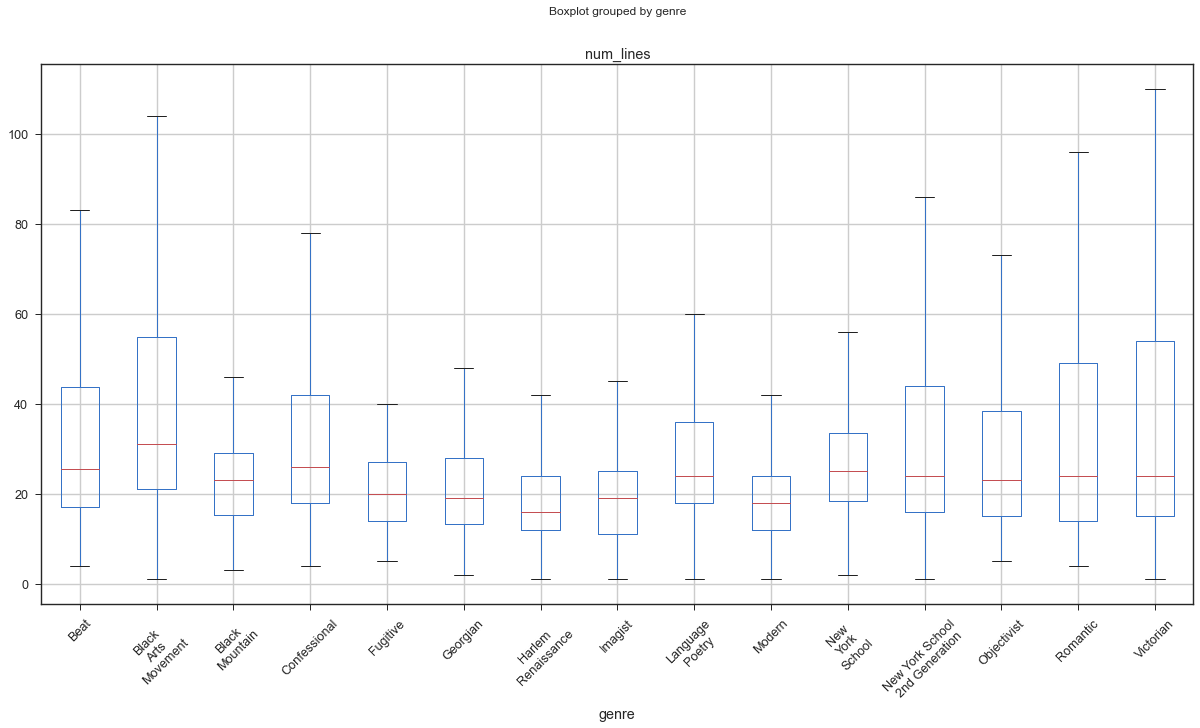

In [355]:
df_trim.boxplot('num_lines', 'genre', showfliers=False, figsize=(20,10))
plt.xticks(ticks=range(1, len(genre_list_pretty)+1), labels=genre_list_pretty, rotation=45);

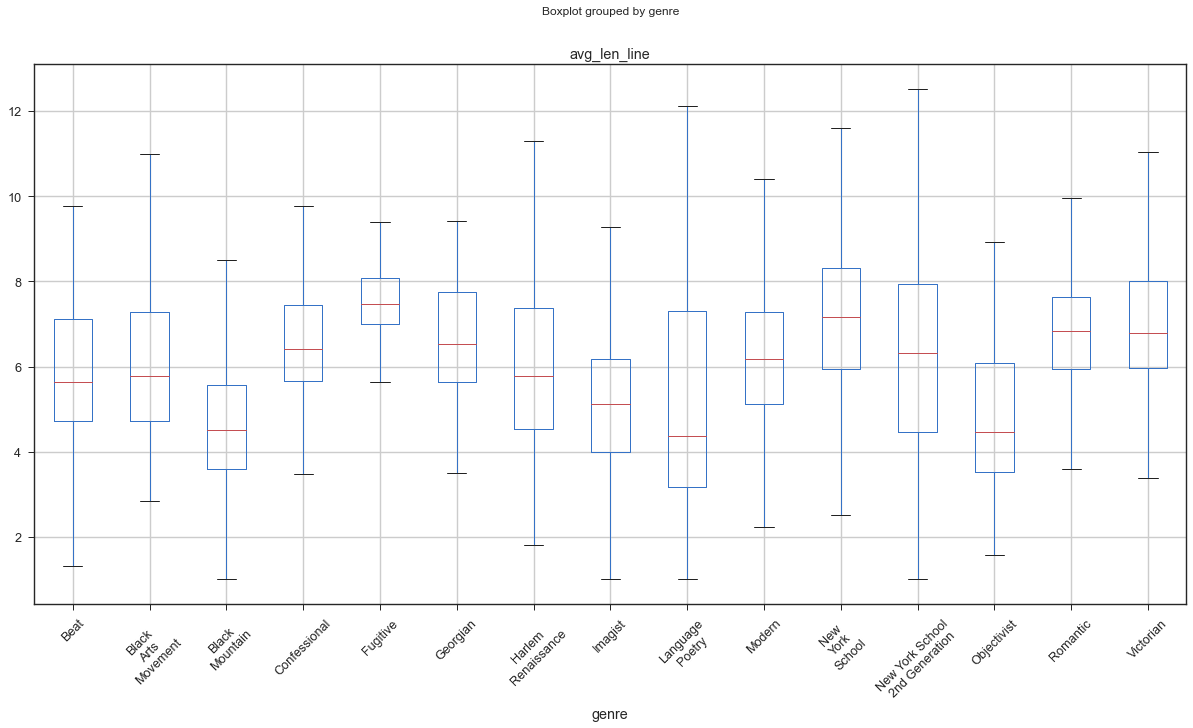

In [356]:
df_trim.boxplot('avg_len_line', 'genre', showfliers=False, figsize=(20,10))
plt.xticks(ticks=range(1, len(genre_list_pretty)+1), labels=genre_list_pretty, rotation=45);

In [318]:
df_trim[df_trim.poet == 'William Carlos Williams'].iloc[80:]

,poet_url,genre,poem_url,poet,title,poem_lines,poem_string,clean_lines,num_lines,avg_len_line
1352,https://www.poetryfoundation.org/poets/william-carlos-williams,imagist,https://www.poetryfoundation.org/poetrymagazine/poems/12703/proof-of-immortality,William Carlos Williams,Proof Of Immortality,"[For there is one thing braver than all flowers;, Richer than clear gems; wider than the sky;, , Immortal and unchangeable; whose powers, Transcen...",For there is one thing braver than all flowers;\nRicher than clear gems; wider than the sky;\n\nImmortal and unchangeable; whose powers\nTranscend...,"[For there is one thing braver than all flowers;, Richer than clear gems; wider than the sky;, Immortal and unchangeable; whose powers, Transcend ...",22,5.727273
1353,https://www.poetryfoundation.org/poets/william-carlos-williams,imagist,https://www.poetryfoundation.org/poetrymagazine/poems/32405/proof-of-immortality-56d215f13b354,William Carlos Williams,Proof Of Immortality,"[HART CRANE, , HART CRANE, , , , AT MELVILLE’S TOMB, , Often beneath the wave, wide from this ledge,, The dice of drowned men’s bones he saw bequ...","HART CRANE\n\nHART CRANE\n\n \n\nAT MELVILLE’S TOMB\n\nOften beneath the wave, wide from this ledge,\nThe dice of drowned men’s bones he saw beque...","[HART CRANE, HART CRANE, AT MELVILLE’S TOMB, Often beneath the wave, wide from this ledge,, The dice of drowned men’s bones he saw bequeath, An em...",20,6.250000
1354,https://www.poetryfoundation.org/poets/william-carlos-williams,imagist,https://www.poetryfoundation.org/poetrymagazine/poems/22610/raleigh-was-right,William Carlos Williams,Raleigh Was Right,"[‘We cannot go to the country, , for the country will bring us, no peace, , ‘What can the small violets, , tell us that grow on furry stems, , in ...",‘We cannot go to the country\n\nfor the country will bring us\nno peace\n\n‘What can the small violets\n\ntell us that grow on furry stems\n\nin t...,"[‘We cannot go to the country, for the country will bring us, no peace, ‘What can the small violets, tell us that grow on furry stems, in the long...",27,4.333333
1355,https://www.poetryfoundation.org/poets/william-carlos-williams,imagist,https://www.poetryfoundation.org/poetrymagazine/poems/22754/river-rhyme,William Carlos Williams,River Rhyme,"[The rumpled river, takes its course, lashed by rain, , This is that now, that tortures, skeletons of weeds, , and muddy waters, eat their, banks ...",The rumpled river\ntakes its course\nlashed by rain\n\nThis is that now\nthat tortures\nskeletons of weeds\n\nand muddy waters\neat their\nbanks t...,"[The rumpled river, takes its course, lashed by rain, This is that now, that tortures, skeletons of weeds, and muddy waters, eat their, banks the ...",12,3.166667
1356,https://www.poetryfoundation.org/poets/william-carlos-williams,imagist,https://www.poetryfoundation.org/poetrymagazine/poems/13116/the-shadow,William Carlos Williams,The Shadow,"[Soft as the bed in the earth, Where a stone has lain—, So soft, so smooth and so cool,, Spring closes me in, With her arms and her hands., , Rich...","Soft as the bed in the earth\nWhere a stone has lain—\nSo soft, so smooth and so cool,\nSpring closes me in\nWith her arms and her hands.\n\nRich ...","[Soft as the bed in the earth, Where a stone has lain—, So soft, so smooth and so cool,, Spring closes me in, With her arms and her hands., Rich a...",22,4.636364
1357,https://www.poetryfoundation.org/poets/william-carlos-williams,imagist,https://www.poetryfoundation.org/poetrymagazine/poems/13119/slow-movement,William Carlos Williams,Slow Movement,"[SLOW MOVEMENT, , All those treasures that lie in the little bolted box whose, , tiny space is, , Mightier than the room of the stars, being secre...","SLOW MOVEMENT\n\nAll those treasures that lie in the little bolted box whose\n\ntiny space is\n\nMightier than the room of the stars, being secret...","[SLOW MOVEMENT, All those treasures that lie in the little bolted box whose, tiny space is, Mightier

In [306]:
df_trim[df_trim['poem_lines'].map(lambda d: len(d)) <= 2]

,poet_url,genre,poem_url,poet,title,poem_lines,poem_string,clean_lines,num_lines,avg_len_line
210,https://www.poetryfoundation.org/poets/henry-dumas,black_arts_movement,https://www.poetryfoundation.org/poems/53477/kef-21,Henry Dumas,Kef 21,"[First there was the earth in my mouth. It was there like a running stream, the July fever sweating the delirium of August, and the green buckling...","First there was the earth in my mouth. It was there like a running stream, the July fever sweating the delirium of August, and the green buckling ...","[First there was the earth in my mouth. It was there like a running stream, the July fever sweating the delirium of August, and the green buckling...",1,88.0
228,https://www.poetryfoundation.org/poets/nikki-giovanni,black_arts_movement,https://www.poetryfoundation.org/poems/90180/rosa-parks,Nikki Giovanni,Rosa Parks,"[This is for the Pullman Porters who organized when people said, place of Gwendolyn Brooks, who wrote the powerful “The]","This is for the Pullman Porters who organized when people said\nplace of Gwendolyn Brooks, who wrote the powerful “The","[This is for the Pullman Porters who organized when people said, place of Gwendolyn Brooks, who wrote the powerful “The]",2,10.0
850,https://www.poetryfoundation.org/poets/john-masefield,georgian,https://www.poetryfoundation.org/poems/54932/sea-fever-56d235e0d871e,John Masefield,Sea Fever,"[I must down to the seas again, to the lonely sea and the sky,, \r And all I ask is a windy day with the white clouds flying,]","I must down to the seas again, to the lonely sea and the sky,\n\r And all I ask is a windy day with the white clouds flying,","[I must down to the seas again, to the lonely sea and the sky,, And all I ask is a windy day with the white clouds flying,]",2,13.5
1283,https://www.poetryfoundation.org/poets/william-carlos-williams,imagist,https://www.poetryfoundation.org/poems/54566/kora-in-hell-improvisations-xiv,William Carlos Williams,Kora in Hell: Improvisations XI﻿V,"[XIV, 1]",XIV\n1,"[XIV, 1]",2,1.0
1491,https://www.poetryfoundation.org/poets/fanny-howe,language_poetry,https://www.poetryfoundation.org/poems/46762/everythings-a-fake,Fanny Howe,Everything’s a Fake,"[Coyote scruff in canyons off Mulholland Drive. Fragrance of sage and rosemary, now it’s spring. At night the mockingbirds ring their warnings of ...","Coyote scruff in canyons off Mulholland Drive. Fragrance of sage and rosemary, now it’s spring. At night the mockingbirds ring their warnings of c...","[Coyote scruff in canyons off Mulholland Drive. Fragrance of sage and rosemary, now it’s spring. At night the mockingbirds ring their warnings of ...",1,235.0
1760,https://www.poetryfoundation.org/poets/t-s-eliot,modern,https://www.poetryfoundation.org/poems/44211/hysteria,T. S. Eliot,Hysteria,"[As she laughed I was aware of becoming involved in her laughter and being part of it, until her teeth were only accidental stars with a talent fo...","As she laughed I was aware of becoming involved in her laughter and being part of it, until her teeth were only accidental stars with a talent for...","[As she laughed I was aware of becoming involved in her laughter and being part of it, until her teeth were only accidental stars with a talent fo...",1,139.0
2276,https://www.poetryfoundation.org/poets/gertrude-stein,modern,https://www.poetryfoundation.org/poems/51215/a-carafe-that-is-a-blind-glass,Gertrude Stein,"A Carafe, that is a Blind Glass","[A kind in glass and a cousin, a spectacle and nothing strange a single hurt color and an arrangement in a system to pointing. All this and not or...","A kind in glass and a cousin, a spectacle and nothing strange a single hurt color and an arrangement in a system to pointing. All this and not ord...","[A kind in glass and a cousin, a spectacle and nothing strange a single hurt color and an arrangement in a system to pointing. All this and not or...",1,38.0
2297,https://www.poetryfoundation.org/poets/gertrude-stein,modern,https://www.poetr

In [199]:
df_trim['poem_lines'] = df_trim['poem_lines'].apply(destringify)
df_trim.loc[0,'poem_lines']

['I don’t care how God-damn smart',
 '\r these guys are: I’m bored.',
 '',
 '\r It’s been raining like hell all day long',
 '\r and there’s nothing to do.',
 '']

In [183]:
lines_rescraper1(df_trim.loc[876,'poem_url'])

(['Down the close, darkening lanes they sang their way',
  'To the siding-shed,',
  'And lined the train with faces grimly gay.',
  '',
  'Their breasts were stuck all white with wreath and spray',
  "As men's are, dead.",
  '',
  'Dull porters watched them, and a casual tramp',
  'Stood staring hard,',
  'Sorry to miss them from the upland camp.',
  'Then, unmoved, signals nodded, and a lamp',
  'Winked to the guard.',
  '',
  'So secretly, like wrongs hushed-up, they went.',
  'They were not ours:',
  'We never heard to which front these were sent.',
  '',
  'Nor there if they yet mock what women meant',
  'Who gave them flowers.',
  '',
  'Shall they return to beatings of great bells',
  'In wild trainloads?',
  'A few, a few, too few for drums and yells,',
  'May creep back, silent, to still village wells',
  'Up half-known roads.'],
 "Down the close, darkening lanes they sang their way\nTo the siding-shed,\nAnd lined the train with faces grimly gay.\n\nTheir breasts were stuck all

In [191]:
lines_rescraper1(df_trim.loc[3882,'poem_url'])

(['Far in a western brookland',
  'That bred me long ago',
  'The poplars stand and tremble',
  'By pools I used to know.',
  '',
  'There, in the windless night-time,',
  'The wanderer, marvelling why,',
  'Halts on the bridge to hearken',
  'How soft the poplars sigh.',
  '',
  'He hears: long since forgotten',
  'In fields where I was known,',
  'Here I lie down in London',
  'And turn to rest alone.',
  '',
  'There, by the starlit fences,',
  'The wanderer halts and hears',
  'My soul that lingers sighing',
  'About the glimmering weirs.'],
 'Far in a western brookland\nThat bred me long ago\nThe poplars stand and tremble\nBy pools I used to know.\n\nThere, in the windless night-time,\nThe wanderer, marvelling why,\nHalts on the bridge to hearken\nHow soft the poplars sigh.\n\nHe hears: long since forgotten\nIn fields where I was known,\nHere I lie down in London\nAnd turn to rest alone.\n\nThere, by the starlit fences,\nThe wanderer halts and hears\nMy soul that lingers sighing\n

In [195]:
lines_rescraper1(df_trim.loc[4276,'poem_url'])

(['Clouds is under clouds and rain',
  'For there will not come again',
  'Two, the beloved sire and son',
  'Whom all gifts were rained upon.',
  'Kindness is all done, alas,',
  'Courtesy and grace must pass,',
  'Beauty, wit and charm lie dead,',
  'Love no more may wreathe the head.',
  '',
  'Now the branch that waved so high',
  'No wind tosses to the sky;',
  "There's no flowering time to come,",
  'No sweet leafage and no bloom.',
  '',
  'Percy, golden-hearted boy,',
  'In the heyday of his joy',
  'Left his new-made bride and chose',
  'The steep way that Honour goes.',
  'Took for his the deathless song',
  'Of the love that knows no wrong:',
  'Could I love thee, dear, so true',
  'Were not Honour more than you?',
  '',
  '(Oh, forgive, dear Lovelace, laid',
  'In this mean Procrustean bed!)',
  'Dear, I love thee best of all',
  "When I go, at England's call.",
  '',
  'In our magnificent sky aglow',
  'How shall we this Percy know',
  'Where he shines among the suns',
  '

In [151]:
lines_rescraper2(df_trim.loc[2281,'poem_url'])

(['I knew too that through them I knew too that he was through, I knew too that he threw them. I knew too that they were through, I knew too I knew too, I knew I knew them.',
  'I knew to them.',
  'If they tear a hunter through, if they tear through a hunter, if they tear through a hunt and a hunter, if they tear through different sizes of the six, the different sizes of the six which are these, a woman with a white package under one arm and a black package under the other arm and dressed in brown with a white blouse, the second Saint Joseph the third a hunter in a blue coat and black garters and a plaid cap, a fourth a knife grinder who is full faced and a very little woman with black hair and a yellow hat and an excellently smiling appropriate soldier. All these as you please.',
  'WHAT DO I SEE?',
  'A very little snail.',
  'A medium sized turkey.',
  'A small band of sheep.',
  'A fair orange tree.',
  'All nice wives are like that.',
  'Listen to them from here.',
  'Oh.',
  'Yo

In [149]:
lines_rescraper2(df_trim.loc[2284,'poem_url'])

(['',
  'One was quite certain that for a long part of his being one being living he had been trying to be certain that he was wrong in doing what he was doing and then when he could not come to be certain that he had been wrong in doing what he had been doing, when he had completely convinced himself that he would not come to be certain that he had been wrong in doing what he had been doing he was really certain then that he was a great one and he certainly was a great one. Certainly every one could be certain of this thing that this one is a great one.',
  'Some said of him, when anybody believed in him they did not then believe in any other one. Certainly some said this of him.',
  'He certainly very clearly expressed something. Some said that he did not clearly express anything. Some were certain that he expressed something very clearly and some of such of them said that he would have been a greater one if he had not been one so clearly expressing what he was expressing. Some said 

In [185]:
lines_rescraper3(df_trim.loc[3036,'poem_url'])

(['Nothing will hurt you that much despite how you feel',
  'the stress on your back shapes your insight',
  'this splendid November rain Toussaint. I find',
  'you by your marks, he says',
  'an imprint',
  'But when I summon you, I talk to—I say—',
  'my memory of your face. It’s kind of crazy',
  'to others. They’re not very interesting he says.',
  'When I first came to this country, and now',
  'I know the language I say, but I had in a dream',
  'spoken it many years previously. That is,',
  'not the language of the dead the language',
  'of France. I took one year of French in 1964',
  'and then nothing but once, in 1977 I spoke French',
  'in a dream all night: I was in the future I',
  'moved here in 1992. Country of the more',
  'logical than I? though the people of my quartier',
  'know and like me, even as I a foreigner remain strange',
  'You do everything alone a woman said to me.',
  'There are ways to care without interfering',
  'but the French speak of anguish frequen

In [144]:
lines_clean = []
for line in lines:
    if '<' in line:
        try:
            lines_clean.append(re.search(line_pattern, line, re.I).group(1).strip())
        except:
            continue
    else:
        lines_clean.append(line.strip())

lines_clean

['I knew too that through them I knew too that he was through, I knew too that he threw them. I knew too that they were through, I knew too I knew too, I knew I knew them.',
 'I knew to them.',
 'If they tear a hunter through, if they tear through a hunter, if they tear through a hunt and a hunter, if they tear through different sizes of the six, the different sizes of the six which are these, a woman with a white package under one arm and a black package under the other arm and dressed in brown with a white blouse, the second Saint Joseph the third a hunter in a blue coat and black garters and a plaid cap, a fourth a knife grinder who is full faced and a very little woman with black hair and a yellow hat and an excellently smiling appropriate soldier. All these as you please.',
 'WHAT DO I SEE?',
 'A very little snail.',
 'A medium sized turkey.',
 'A small band of sheep.',
 'A fair orange tree.',
 'All nice wives are like that.',
 'Listen to them from here.',
 'Oh.',
 'You did not ha

In [142]:
len(lines)

79

In [141]:
page = rq.get(df_trim.loc[2281,'poem_url'])
soup = bs(page.content, 'html.parser')
lines_raw = soup.find('div', {'data-view': 'PoemView'}).contents
lines = [normalize('NFKD', str(line)) for line in lines_raw if line]
lines = [line.replace('<br/>', '') for line in lines]
lines = [line.strip() for line in lines if line.strip()]
lines
#     lines = [normalize('NFKD', str(line)) for line in lines_raw if line]
#     lines = [line.replace('<br/>', '') for line in lines]
#     lines = [line.strip() for line in lines if line]

['I knew too that through them I knew too that he was through, I knew too that he threw them. I knew too that they were through, I knew too I knew too, I knew I knew them.',
 '<p>        I knew to them.</p>',
 '<p>        If they tear a hunter through, if they tear through a hunter, if they tear through a hunt and a hunter, if they tear through different sizes of the six, the different sizes of the six which are these, a woman with a white package under one arm and a black package under the other arm and dressed in brown with a white blouse, the second Saint Joseph the third a hunter in a blue coat and black garters and a plaid cap, a fourth a knife grinder who is full faced and a very little woman with black hair and a yellow hat and an excellently smiling appropriate soldier. All these as you please.</p>',
 '<p>        In the meantime examples of the same lily. In this way please have you rung.\r\n </p>',
 '<p align="center">WHAT DO I SEE?</p>',
 '<p>        A very little snail.</p>'

In [110]:
lines_rescraper1('https://www.poetryfoundation.org/poems/55214/matisse')

([], '')

In [67]:
page = rq.get('https://www.poetryfoundation.org/poems/58243/gift-56d23c725d4d9')
soup = bs(page.content, 'html.parser')
lines_raw = soup.find_all('div', {'style': 'text-indent: -1em; padding-left: 1em;'})
lines_raw

[<div style="text-indent: -1em; padding-left: 1em;"><p class="Corps">Nothing will hurt you that much despite how you feel<br/></p></div>,
 <div style="text-indent: -1em; padding-left: 1em;"> <p class="Corps">the stress on your back shapes your insight<br/></p></div>,
 <div style="text-indent: -1em; padding-left: 1em;"> <p class="Corps">this splendid November rain Toussaint. I find<br/></p></div>,
 <div style="text-indent: -1em; padding-left: 1em;"> <p class="Corps">you by your marks, he says<br/></p></div>,
 <div style="text-indent: -1em; padding-left: 1em;"> <p class="Corps">                                                  an imprint<br/></p></div>,
 <div style="text-indent: -1em; padding-left: 1em;"> <p class="Corps">But when I summon you, I talk to—I say—<br/></p></div>,
 <div style="text-indent: -1em; padding-left: 1em;"> <p class="Corps">my memory of your face. It’s kind of crazy<br/></p></div>,
 <div style="text-indent: -1em; padding-left: 1em;"> <p class="Corps">to others. They

In [88]:
lines = [normalize('NFKD', str(line.contents[-1])) for line in lines_raw if line.contents]
lines

['<p class="Corps">Nothing will hurt you that much despite how you feel<br/></p>',
 '<p class="Corps">the stress on your back shapes your insight<br/></p>',
 '<p class="Corps">this splendid November rain Toussaint. I find<br/></p>',
 '<p class="Corps">you by your marks, he says<br/></p>',
 '<p class="Corps">                                                  an imprint<br/></p>',
 '<p class="Corps">But when I summon you, I talk to—I say—<br/></p>',
 '<p class="Corps">my memory of your face. It’s kind of crazy<br/></p>',
 '<p class="Corps">to others. They’re not very interesting he says.<br/></p>',
 '<p class="Corps">When I first came to this country, and now<br/></p>',
 '<p class="Corps">I know the language I say, but I had in a dream<br/></p>',
 '<p class="Corps">spoken it many years previously. That is,<br/></p>',
 '<p class="Corps">not the language of the dead the language<br/></p>',
 '<p class="Corps">of France. I took one year of French in 1964<br/></p>',
 '<p class="Corps">and then

In [ ]:
def lines_rescraper(poem_url):
    

In [77]:
lines_raw[1].contents

[' ', <p class="Corps">the stress on your back shapes your insight<br/></p>]

In [78]:
line_pattern = '>(.*?)<'
test = re.search(line_pattern, str(lines_raw[1].contents[1]), re.I).group(1)
test

'the stress on your back shapes your insight'

In [89]:
def poem_scraper2(poem_url):
    '''Scraper for PoetryFoundation.org--scrapes poet name, poem title, poem year, list of poem's lines,
       and the poem as a string.
       Input the url for a poem's page on PoetryFoundation.org.
       Output is a list.'''
    
    # load a page and soupify it
    page = rq.get(poem_url)
    soup = bs(page.content, 'html.parser')
    
    # series of try/except statements to scrape info or return NaN value if desired info cannot be scraped
    try:
        poet = soup.find('a', href=re.compile('.*/poets/.*')).contents[0]
    except:
        poet = np.nan
        
    try:
        title = soup.find('h1').contents[-1].strip()
    except:
        try:
            title_pattern = '[a-z\-]*$'
            title = re.search(title_pattern, poem_url, re.I).group().replace('-', ' ').title()
        except:
            title = np.nan
        
    try:
        lines_raw = soup.find_all('div', {'style': 'text-indent: -1em; padding-left: 1em;'})
        lines = [normalize('NFKD', str(line.contents[-1])) for line in lines_raw if line.contents]
        lines = [line.replace('<br/>', '') for line in lines]
        try:
            line_pattern = '>(.*?)<'
            lines = [re.search(line_pattern, line, re.I).group(1) if '<' in line else line for line in lines]
        except:
            try:
                lines = [re.sub('<.*>', '', line) if '<' in line else line for line in lines]
            except:
                lines = np.nan
        if lines == []:
            try:
                img_link = soup.find('img', src=re.compile('.*/jstor/.*'))['src']
                img_data = rq.get(img_link).content
                with open('poem_imgs/temp.png', 'wb') as handle:
                    handle.write(img_data)
                text = pytesseract.image_to_string('poem_imgs/temp.png')
                scan_pattern = fr'{title.upper()}\s*((.*\s.*)*)'
                lines = re.search(scan_pattern, text, re.I).group(1).splitlines()
            except:
                lines = np.nan
        lines = [line.strip() for line in lines if line]
    except:
        try:
            lines_raw = soup.find_all('div', {'style': 'text-align: justify;'})
            lines = [normalize('NFKD', str(line.contents[0])) for line in lines_raw if line.contents]
            lines = [line.replace('<br/>', '') for line in lines]
            lines = [line.strip() for line in lines if line]
            if lines == []:
                try:
                    lines_raw = soup.find('div', {'data-view': 'PoemView'}).contents[1]
                    lines = [normalize('NFKD', str(line)) for line in lines_raw if line]
                    lines = [line.replace('<br/>', '') for line in lines]
                    lines = [line.strip() for line in lines if line]
                except:
                    lines = np.nan
        except:
            lines = np.nan
            
        
    try:
        poem_string = '\n'.join(lines)
    except:
        poem_string = np.nan
        
    try:
        year_blurb = soup.find('span', {'class': 'c-txt c-txt_note c-txt_note_mini'}).contents[2]
        year_pattern = r'[12]\d{3}'
        year = int(re.search(year_pattern, year_blurb, re.I).group())
    except:
        try:
            year_blurb = soup.find_all('span', {'class': 'c-txt c-txt_note c-txt_note_mini'})[-1].contents[2]
            year_pattern = r'[12]\d{3}'
            year = int(re.search(year_pattern, year_blurb, re.I).group())
        except:
            year = np.nan
    
    info = [poet, title, year, lines, poem_string]
    
    return info

In [ ]:
lines = [normalize('NFKD', str(line.contents[0])) for line in lines_raw if line.contents]

In [65]:
lines = [normalize('NFKD', str(line.contents[0])) for line in lines_raw if line.contents]
lines

['<p class="Corps">Nothing will hurt you that much despite how you feel<br/></p>',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '<br clear="all"/>',
 '<br/>']

In [59]:
df_trim.loc[3036,'poem_url']

'https://www.poetryfoundation.org/poems/58243/gift-56d23c725d4d9'